# SEQ 2D

Schrödinger equation is given as:

$$
(-\frac{\hbar^2}{2m} \Delta  - \frac{Ze^2}{r - r_d}) \Psi = E \Psi(x,y) 
$$

Laplas operator

$$
\Delta = \frac{\partial^2}{\partial^2 x} + \frac{\partial^2}{\partial^2 y} \\
\frac{\partial^2 \Psi}{\partial^2 x} = \frac{\Psi(x+1) - 2\Psi(x) + \Psi(x-1)}{dx^2}  \\
\frac{\partial^2 \Psi}{\partial^2 y} = \frac{\Psi(y+1) - 2\Psi(y) + \Psi(x-1)}{dy^2}  \\
$$

Let's suppose that we have (3x3) grid. Wave function is represented as:
$$
\begin{pmatrix}
\Psi_{11} & \Psi_{12} & \Psi_{13}  \\
\Psi_{21} & \Psi_{22} & \Psi_{23}  \\
\Psi_{31} & \Psi_{32} & \Psi_{33}  \\
\end{pmatrix}
$$

We will present it like vector:
$$
\begin{pmatrix}
\Psi_{11} & \Psi_{12} & \Psi_{13} &  \Psi_{21} & \Psi_{22} & \Psi_{23} & \Psi_{31} & \Psi_{32} & \Psi_{33} \\ 
\end{pmatrix}^T
$$

Within this basis differential operator x will have the followig form:
$$
\frac{\partial^2 }{\partial^2 y} = 
\frac{1}{dx^2}
\begin{pmatrix}
-2 & 1 & 0 & 0 & 0 & 0 &   0 & 0 & 0 \\
1 & -2 & 1 & 0 & 0 & 0 &  0 & 0 & 0  \\
0 &  1 & -2 & 0 & 0 & 0 & 0 & 0 & 0  \\
0 & 0 & 0 & -2 & 1 & 0 &   0 & 0 & 0 \\
0 & 0 & 0 & 1 & -2 & 1 &   0 & 0 & 0 \\
0 & 0 & 0 & 0 & 1 & -2 &   0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 &   -2 & 1 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 &   1 & -2 & 1 \\
0 & 0 & 0 & 0 & 0 & 0 &   0 & 1 & -2 \\
\end{pmatrix} = 
\frac{1}{dx^2}
\begin{pmatrix}
-2 & 1 & 0 \\
1 & -2 & 1 \\
0 &  1 & -2 \\
\end{pmatrix} \otimes \hat{I}  = \frac{1}{dx^2} D \otimes \hat{I} 
\\
\\
$$
On the other hand, differential operator y 
$$
\frac{\partial^2 }{\partial^2 x} = 
\frac{1}{dy^2}
\begin{pmatrix}
-2\hat{I} & 1\hat{I} & 0 \\
\hat{I} & -2\hat{I} & \hat{I} \\
0 &  \hat{I} & -2\hat{I} \\
\end{pmatrix} = 
\frac{1}{dy^2}
\begin{pmatrix}
-2 & 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 \\
0 & -2 & 0 & 0 & 1 & 0 & 0 & 0 & 0 \\
0 & 0 & -2 & 0 & 0 & 1 & 0 & 0 & 0 \\
1 & 0 & 0 & -2 & 0 & 0 & 1 & 0 & 0 \\
0 & 1 & 0 & 0 & -2 & 0 & 0 & 1 & 0 \\
0 & 0 & 1 & 0 & 0 & -2 & 0 & 0 & 1 \\
0 & 0 & 0 & 1 & 0 & 0 & -2 & 0 & 0 \\
0 & 0 & 0 & 0 & 1 & 0 & 0 & -2 & 0 \\
0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 & -2 \\
\end{pmatrix}  = \frac{1}{dy^2}  \hat{I} \otimes D
$$

Resulting Laplas operator will have the form: $$ (dx = dy = d)$$
$$
\Delta = \frac{\partial^2}{\partial^2 x} + \frac{\partial^2}{\partial^2 y} = \frac{1}{d^2} ( D \otimes \hat{I} +  \hat{I} \otimes D) = \frac{1}{d^2} D \otimes D
$$

The final Schrödinger equation takes the form:

$$
(-\frac{1}{2m d^2} D \otimes D  - \frac{Ze^2}{r - r_d}) \Psi = E \Psi(x,y) 
$$


hamiltonian was constructed!


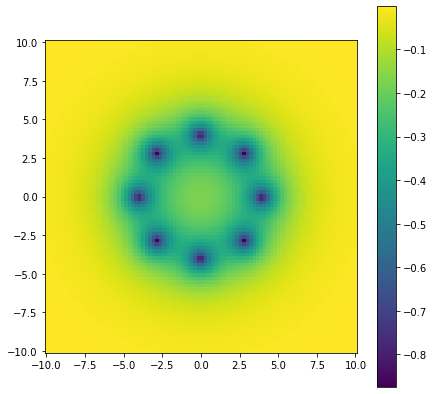

In [1]:
import numpy as np
import math 
from scipy.sparse.linalg import eigsh
from scipy.sparse.linalg import eigs
from scipy import sparse
import matplotlib.pylab as plt


def get_potential_ring(x,y, d, a, delta, offset):
    r = np.sqrt(x**2 + y**2)
    phi = np.arctan2(y, x) 
    V = (-1)/(np.abs(r - 0.1*d*np.cos(phi)**2 - d) +delta)*np.exp(-np.abs(r - 0.1*d*np.cos(phi)**2 - d)/a) + offset 
    return V



def get_potential_points(x, y, d, a, delta, offset):
    coord = np.array([[-d, 0], [d, 0], [0, -d], [0, d], [d/np.sqrt(2), d/np.sqrt(2)], [d/np.sqrt(2), -d/np.sqrt(2)], [-d/np.sqrt(2), d/np.sqrt(2)], [-d/np.sqrt(2), -d/np.sqrt(2)]])
    V = 0
    for i in range(8):
        r_i = np.sqrt( (x-coord[i][0])**2 + (y-coord[i][1])**2)
        V += (-0.8)/(r_i +delta)*np.exp(-r_i/a)
    
    return V

N = 90
d  = 4
a = 2
delta = 1
offset = 0
rMax = 10



X,Y = np.meshgrid(np.linspace(-rMax, rMax, N, dtype=float), np.linspace(-rMax, rMax, N, dtype=float)) # in Ang


V  = get_potential_points(X,Y, d, a, delta, offset)

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111)
ax.set_aspect(1) 
im = ax.pcolor(X,Y,V,  shading='nearest')
plt.colorbar(im)


diag = np.ones([N])
diags = np.array([diag, -2*diag, diag])
D = sparse.spdiags(diags, np.array([-1,0,1]),N,N)
T = -(1/2)*sparse.kronsum(D,D)

U = sparse.diags(V.reshape(N**2), (0))
H = T + U

# print(np.min(U.todense()))

print('hamiltonian was constructed!')

In [ ]:
#eigenproblem

# eigenvalues, eigenvectors = eigsh(H, k = 5, which = 'SM')

Ham = H.todense()

eigenvalues, eigenvectors = np.linalg.eig(Ham)
eigenvectors = np.array(eigenvectors)

idx = eigenvalues.argsort()[::1]   
eigenvalues = np.real(eigenvalues)[idx]
eigenvectors = np.real(eigenvectors)[:,idx]


print('eigenproblem was solved!')

In [ ]:
#plotting
m = 4

def get_e(n):
    return eigenvectors.T[n].reshape((N,N))

# print(eigenvalues[m])

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111)
ax.set_aspect(1) 
plt.title(f'eigenvalue = {str(eigenvalues[m])}',fontsize=12)
im = ax.pcolor(X,Y,get_e(m)**2,  shading='nearest')
plt.colorbar(im)

fig.savefig(f'{str(m+1)}.png', dpi=300)